1. 캐글 산탄데르 고객 만족 예측
 - 피처 이름은 익명 처리되어, 이름으로 어떤 속성인지 추론 불가
 - 클래스 레이블 명은 Target. 1: 불만족, 0: 만족
 - 모델의 성능 평가는 ROC-AUC로 평가 (비대칭적 데이터 이므로)

1. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('/content/drive/MyDrive/machine_learning_data/santander-customer-satisfaction/train.csv')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
# 371칼럼,111개의 float형, 260개의 int형
print(cust_df.info())
print('-'*50)

# Target 속성(레이블 값)의 분포
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied 비율: {0:.2f}'.format((unsatisfied_cnt/total_cnt)))
print('-'*50)

# 각 피처 값의 분포 확인
# var3의 min이 -99999인 것은, 예외 값이나 NaN을 변환한 것임
# 따라서 해당 값을 변경해줘야함
cust_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None
--------------------------------------------------
0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율: 0.04
--------------------------------------------------


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
# var3의 -99999값을 가장 값이 많은 2로 변환
cust_df['var3'].replace(-999999, 2, inplace=True)

# ID피처는 단순 식별자이므로 삭제
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리.
# 레이블 칼럼은 DataFrame 맨 마지막에 위치해있음
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:', X_features.shape)

피처 데이터 shape: (76020, 369)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))


# 학습과 테스트 데이터 세트의 TARGET 값의 분포가
# 원본 데이터와 유사하게 분리되었는지 확인
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators: 500
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc, 조기 중단 파라미터는 100
# XGBoost 평가지표 : 테스트 데이터 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric='auc', eval_set=[(X_test, y_test)], verbose=False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8419


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 n_estimators를 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {
    'max_depth':[5,7],
    'min_child_weight':[1,3],
    'colsample_bytree':[0.5, 0.75] # 트리 생성에 필요한 피처를 임의로 샘플링하는 비율
}

# cv=3
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

# 최적으로 학습된 estimator로 예측
gridcv_pred = gridcv.best_estimator_
xgb_roc_score = roc_auc_score(y_test, gridcv_pred.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.722463
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.807648
[2]	validation_0-auc:0.804566
[3]	validation_0-auc:0.809325
[4]	validation_0-auc:0.816951
[5]	validation_0-auc:0.812634
[6]	validation_0-auc:0.814491
[7]	validation_0-auc:0.820561
[8]	validation_0-auc:0.823553
[9]	validation_0-auc:0.821292
[10]	validation_0-auc:0.825279
[11]	validation_0-auc:0.827817
[12]	validation_0-auc:0.828775
[13]	validation_0-auc:0.827865
[14]	validation_0-auc:0.826745
[15]	validation_0-auc:0.82862
[16]	validation_0-auc:0.830562
[17]	validation_0-auc:0.833342
[18]	validation_0-auc:0.83416
[19]	validation_0-auc:0.833319
[20]	validation_0-auc:0.834575
[21]	validation_0-auc:0.833945
[22]	validation_0-auc:0.833423
[23]	validation_0-auc:0.835829
[24]	validation_0-auc:0.83679
[25]	validation_0-auc:0.83488
[26]	validation_0-auc:0.834584
[27]	validation_0-auc:0.835882
[28]	validation_0-auc:0.837484
[29]	validation_0-auc:0.837547
[30]	validation_0-au

3. LightBGM 모델로 학습과 튜닝

In [7]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators= 500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,
             eval_metric='auc', eval_set = evals, verbose=False)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8396


In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60,100],
          'subsample':[0.8, 1]}

# cv는 3
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_test, y_test)], verbose=False)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8442


In [13]:
lgbm_clf = gridcv.best_estimator_
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,
             eval_metric='auc', eval_set=[(X_test, y_test)], verbose=False)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8442


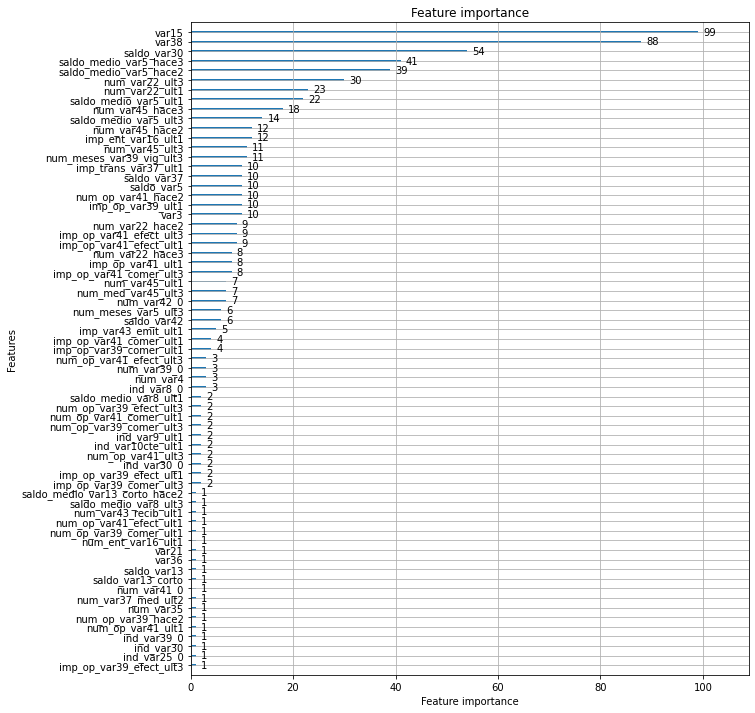

In [15]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax)